# 🔴 RetroPGF3 Anonymized Voting Analysis 

Data available here:
<br>https://github.com/ethereum-optimism/op-analytics/blob/main/rpgf/rpgf3/results/anonymized_project_votes.csv

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
matplotlib.rcParams.update(
    {
        'text.usetex': False,
        'font.family': 'Arial'
    }
)
warnings.filterwarnings("ignore")

## Prep and do some variance analysis on the data

In [2]:
# load a local copy of the data
csv = pd.read_csv("../data/anonymized_project_votes.csv")

# shorten name and remove special characters
csv['project_name'] = csv['project_name'].apply(lambda string: "".join([s for s in string[:25]]))# if s.isalnum() or s.isspace()]))

# turn the vote amounts into a list of values
csv['amount'] = csv['amount'].apply(eval)

# remove projects that failed to make quorum
csv = csv[csv['number_of_votes'] >= 17]

# run some basic stats analysis
csv['mean'] = round(csv['amount'].apply(lambda amt: np.mean([x for x in amt if x])))
csv['std'] = round(csv['amount'].apply(lambda amt: np.std([x for x in amt if x])))
csv['median'] = round(csv['amount'].apply(lambda amt: np.median([x for x in amt if x])))
csv['coeff_variance'] = csv['std'] / csv['mean']
csv['max'] = csv['amount'].apply(lambda amt: max(amt))
csv['zeroes'] = csv['amount'].apply(lambda amt: len([x for x in amt if not x]))
csv['max_to_median'] = csv['max'] / csv['median']

# count num votes more than 2 std deviations to the right
csv['outliers'] = csv.apply(lambda row: len([x for x in row['amount'] if (x-row['mean'])/row['std'] > 2]), axis=1)

# simple metric to measure how divisive a project might be
csv['divisive_score'] = np.sqrt(csv['zeroes']) * np.sqrt(csv['outliers'])

csv.head()

project_name                                             amount  \
0     0xDeFiTH  [100000.0, 1700.0, 0.0, 5000.0, 0.0, 2000.0, 4...   
1      0xKhmer  [1500.0, 1700.0, 50000.0, 10000.0, 5000.0, 240...   
2     0xSalman  [25000.0, 50000.0, 25000.0, 57000.0, 10000.0, ...   
3       0xs34n  [25000.0, 67000.0, 150000.0, 15000.0, 25000.0,...   
4          1W3  [150000.0, 75000.0, 2000.0, 5000.0, 150000.0, ...   

   number_of_votes     mean      std   median  coeff_variance       max  \
0               23  12981.0  20427.0  10000.0        1.573608  100000.0   
1               22  28909.0  26253.0  24000.0        0.908125  100000.0   
2               19  30368.0  24923.0  25000.0        0.820699  100000.0   
3               31  49394.0  56069.0  25000.0        1.135138  200000.0   
4               27  37736.0  42547.0  20000.0        1.127491  150000.0   

   zeroes  max_to_median  outliers  divisive_score  
0       2      10.000000         1        1.414214  
1       0       4.166667         1        0.000000  
2       0       4.000000         1        0.000000  
3       0       8.000000         1        0.000000  
4       2       7.500000         2        2.000000

In [3]:
# most zeroed
csv.sort_values(by='zeroes').tail(15)[['project_name', 'zeroes', 'number_of_votes']]

project_name  zeroes  number_of_votes
43           Bankless Africa       5               33
490                Synthetix       5               54
133                DappRadar       5               54
205          Flipside Crypto       5               47
488             Synapse Labs       6               29
487              Synapse DAO       6               33
334          Nacion Bankless       6               40
252                 Immunefi       6               53
497                 Tenderly       7               74
317                  Messari       8               39
567                     ZORA       8               59
45              Bankless DAO       8               47
173  Edge & Node / The Graph      10               58
20                   Alchemy      12               59
333                 NFTEarth      12               20

In [4]:
# positive outliers
csv.sort_values(by='outliers').tail(15)[['project_name', 'max', 'outliers', 'number_of_votes']]

project_name        max  outliers  number_of_votes
544     WTF Academy   250000.0         5               43
18            Agora  2500000.0         5               88
442     Revoke.cash  1300000.0         5               90
593           ethOS   600000.0         5               55
177          Erigon  4000000.0         5               92
29      ApeWorX LTD  1300000.0         5               63
576    beaconcha.in  3000000.0         5               94
235         Hardhat  5000000.0         5              101
461        Snapshot  1200000.0         6               77
601     go-ethereum  5000000.0         6              101
612          libp2p  1500000.0         7               85
463        Solidity  5000000.0         7              109
553          Web3js  1300000.0         9               90
412  Protocol Guild  5000000.0        10               95
385       Otterscan  1500000.0        10               99

In [5]:
# max votes that are much higher than median
csv.sort_values(by='max_to_median').tail(15)[['project_name', 'max', 'median', 'outliers', 'zeroes', 'number_of_votes']]

project_name        max   median  outliers  zeroes  \
552                 Web3bridge  5000000.0  50000.0         1       3   
246                        IC3  5000000.0  50000.0         3       0   
513  Token Engineering Academy  5000000.0  50000.0         1       0   
446  Rollup Economics Dune Spe  1500000.0  15000.0         2       0   
167                   ETHAccra  2500000.0  25000.0         1       3   
365  Optimism Community Govern  5000000.0  48000.0         1       0   
495                        Taz  1100000.0  10000.0         2       0   
166        ETH Daily (OP News)  3400000.0  26000.0         1       0   
262            Invest in Music  3400000.0  25000.0         1       1   
386                 OurNetwork  1500000.0  10500.0         1       0   
337                Newtro Arts  3400000.0  20000.0         1       2   
314        Mechanism Institute  5000000.0  27500.0         1       0   
301                      Lemon  1000000.0   5000.0         1       5   
271  Josh | The Blockchain Soc  5000000.0  25000.0         1       0   
47              Bankless Japan  5000000.0   8350.0         1       5   

     number_of_votes  
552               36  
246               50  
513               40  
446               33  
167               48  
365               49  
495               21  
166               44  
262               20  
386               28  
337               31  
314               38  
301               24  
271               31  
47                29

In [6]:
# most potentially divisive projects
csv.sort_values(by='divisive_score').tail(15)[['project_name', 'max', 'median', 'outliers', 'zeroes', 'number_of_votes']]

project_name        max    median  outliers  zeroes  \
29               ApeWorX LTD  1300000.0  100000.0         5       2   
42          Bankless Academy   130000.0   30000.0         2       5   
169                ETHGlobal  5000000.0  285000.0         5       2   
217                   Gelato  1000000.0   77000.0         3       4   
536                Velodrome  5000000.0  100000.0         4       3   
571                   Zuzalu  2000000.0  100000.0         4       3   
461                 Snapshot  1200000.0  200000.0         6       2   
612                   libp2p  1500000.0  300000.0         7       2   
133                DappRadar   500000.0   80000.0         3       5   
248                     IPFS  2000000.0  250000.0         4       4   
334          Nacion Bankless   150000.0   15000.0         3       6   
567                     ZORA  2000000.0  150000.0         3       8   
497                 Tenderly  1500000.0  100000.0         4       7   
20                   Alchemy   580000.0   77000.0         3      12   
173  Edge & Node / The Graph   500000.0   77000.0         4      10   

     number_of_votes  
29                63  
42                45  
169               90  
217               64  
536               44  
571               46  
461               77  
612               85  
133               54  
248               77  
334               40  
567               59  
497               74  
20                59  
173               58

## Categorize projects based on number and variance of vote amounts

In [7]:
VAR_THRESH = 1.5
VOTE_THRESH = 40

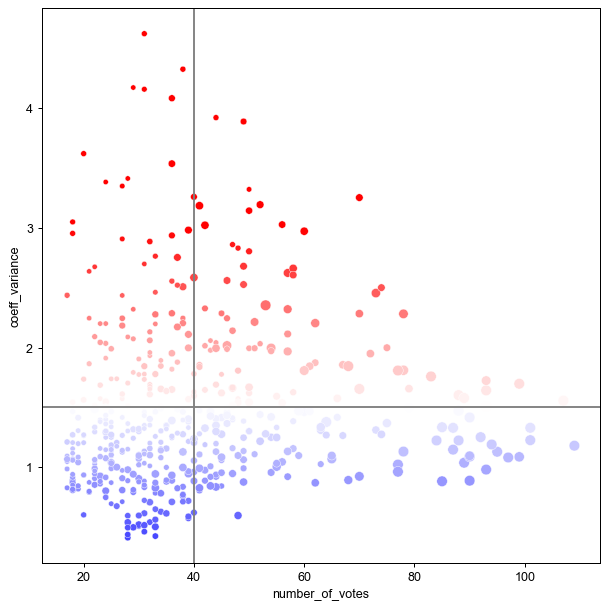

In [8]:
fig, ax = plt.subplots(figsize=(8,8), dpi=90)
(
    sns.scatterplot(
        data=csv, 
        x='number_of_votes', 
        y='coeff_variance', 
        size='median', 
        hue='coeff_variance', 
        hue_norm=(0,3), 
        palette='bwr', 
        size_norm=(10_000,200_000), 
        legend=False)
)
ax.axhline(VAR_THRESH, color='gray')
ax.axvline(VOTE_THRESH, color='gray')

In [9]:
def categorize(votes, coeff):
    if coeff < VAR_THRESH:
        _type = "Lower variance"
    else:
        _type = "Higher variance"
    if votes < VOTE_THRESH:
        _type += ", less well-known"
    else:
        _type += ", more well-known"
    return _type
        
csv['category'] = csv.apply(lambda x: categorize(x['number_of_votes'], x['coeff_variance']), axis=1)
csv['category'].value_counts()

category
Lower variance, less well-known     207
Lower variance, more well-known     115
Higher variance, less well-known     92
Higher variance, more well-known     88
Name: count, dtype: int64

## Visualize the vote distributions by category

In [10]:
# unstack the voting data
votes = []
for _, row in csv.iterrows():
    amounts = row['amount']
    n = row['project_name']
    c = row['category']
    for a in amounts:
        votes.append((n, min(max(a,.1),500_000), c))
df = pd.DataFrame(votes, columns=['project', 'vote', 'category'])
df.head(1)

project      vote                          category
0  0xDeFiTH  100000.0  Higher variance, less well-known

In [11]:
CATS = list(df['category'].unique())

In [12]:
# make a pretty plot ;)
def stripplot(category):
    
    dff = df[df['category'] == category]
    n = len(dff['project'].unique())
    
    fig, ax = plt.subplots(figsize=(5,n/5), dpi=200, facecolor='white')
    sns.stripplot(
        dff, 
        y='project', 
        x='vote', 
        hue='vote', 
        palette='coolwarm',
        hue_norm=(0,200_000),
        orient='h', 
        alpha=.5, 
        linewidth=0,
        legend=False,
        dodge=0
    )
    ax.set_xlim(-20_000,520_000)

    for lbl in ax.get_yticklabels():
        p = lbl.get_text()
        y = lbl.get_position()[1]
        right = len(dff[(dff['project']==p) & (dff['vote']==500_000)])
        if right:
            ax.text(s=right, x=510_000, y=y, ha='left', va='center', fontsize=8)
        left = len(dff[(dff['project']==p) & (dff['vote']==0.1)])
        if left:
            ax.text(s=left, x=-10_000, y=y, ha='right', va='center', fontsize=8)

    ax.grid(color='grey', linestyle='--', linewidth=.5)        
    ax.spines[['right', 'top', 'left', 'bottom']].set_visible(False)
    ax.tick_params(direction='out', length=0, width=.5, grid_alpha=0.5)
    
    title = f"Votes for '{category.lower()}' projects\n"
    ax.set_title(title, loc='left')

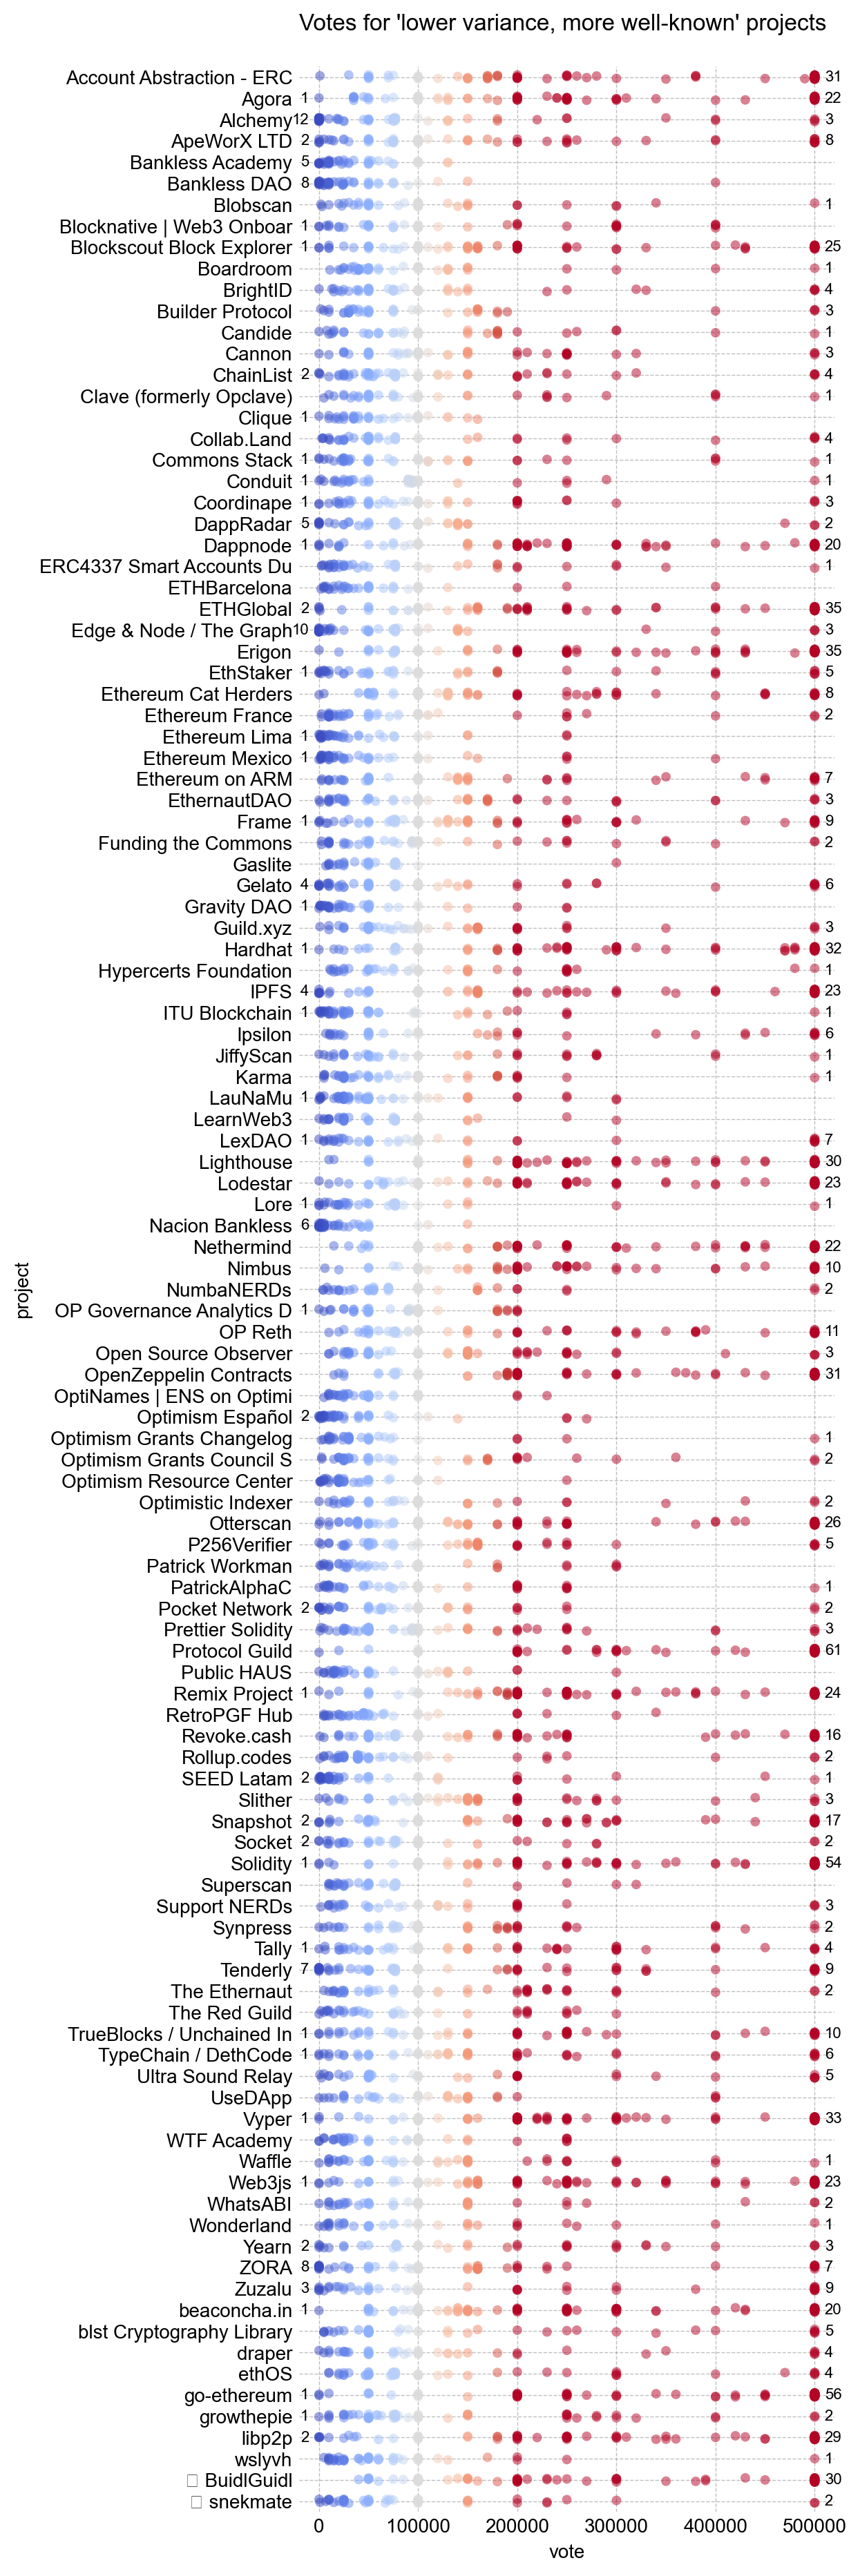

In [13]:
stripplot(CATS[3])

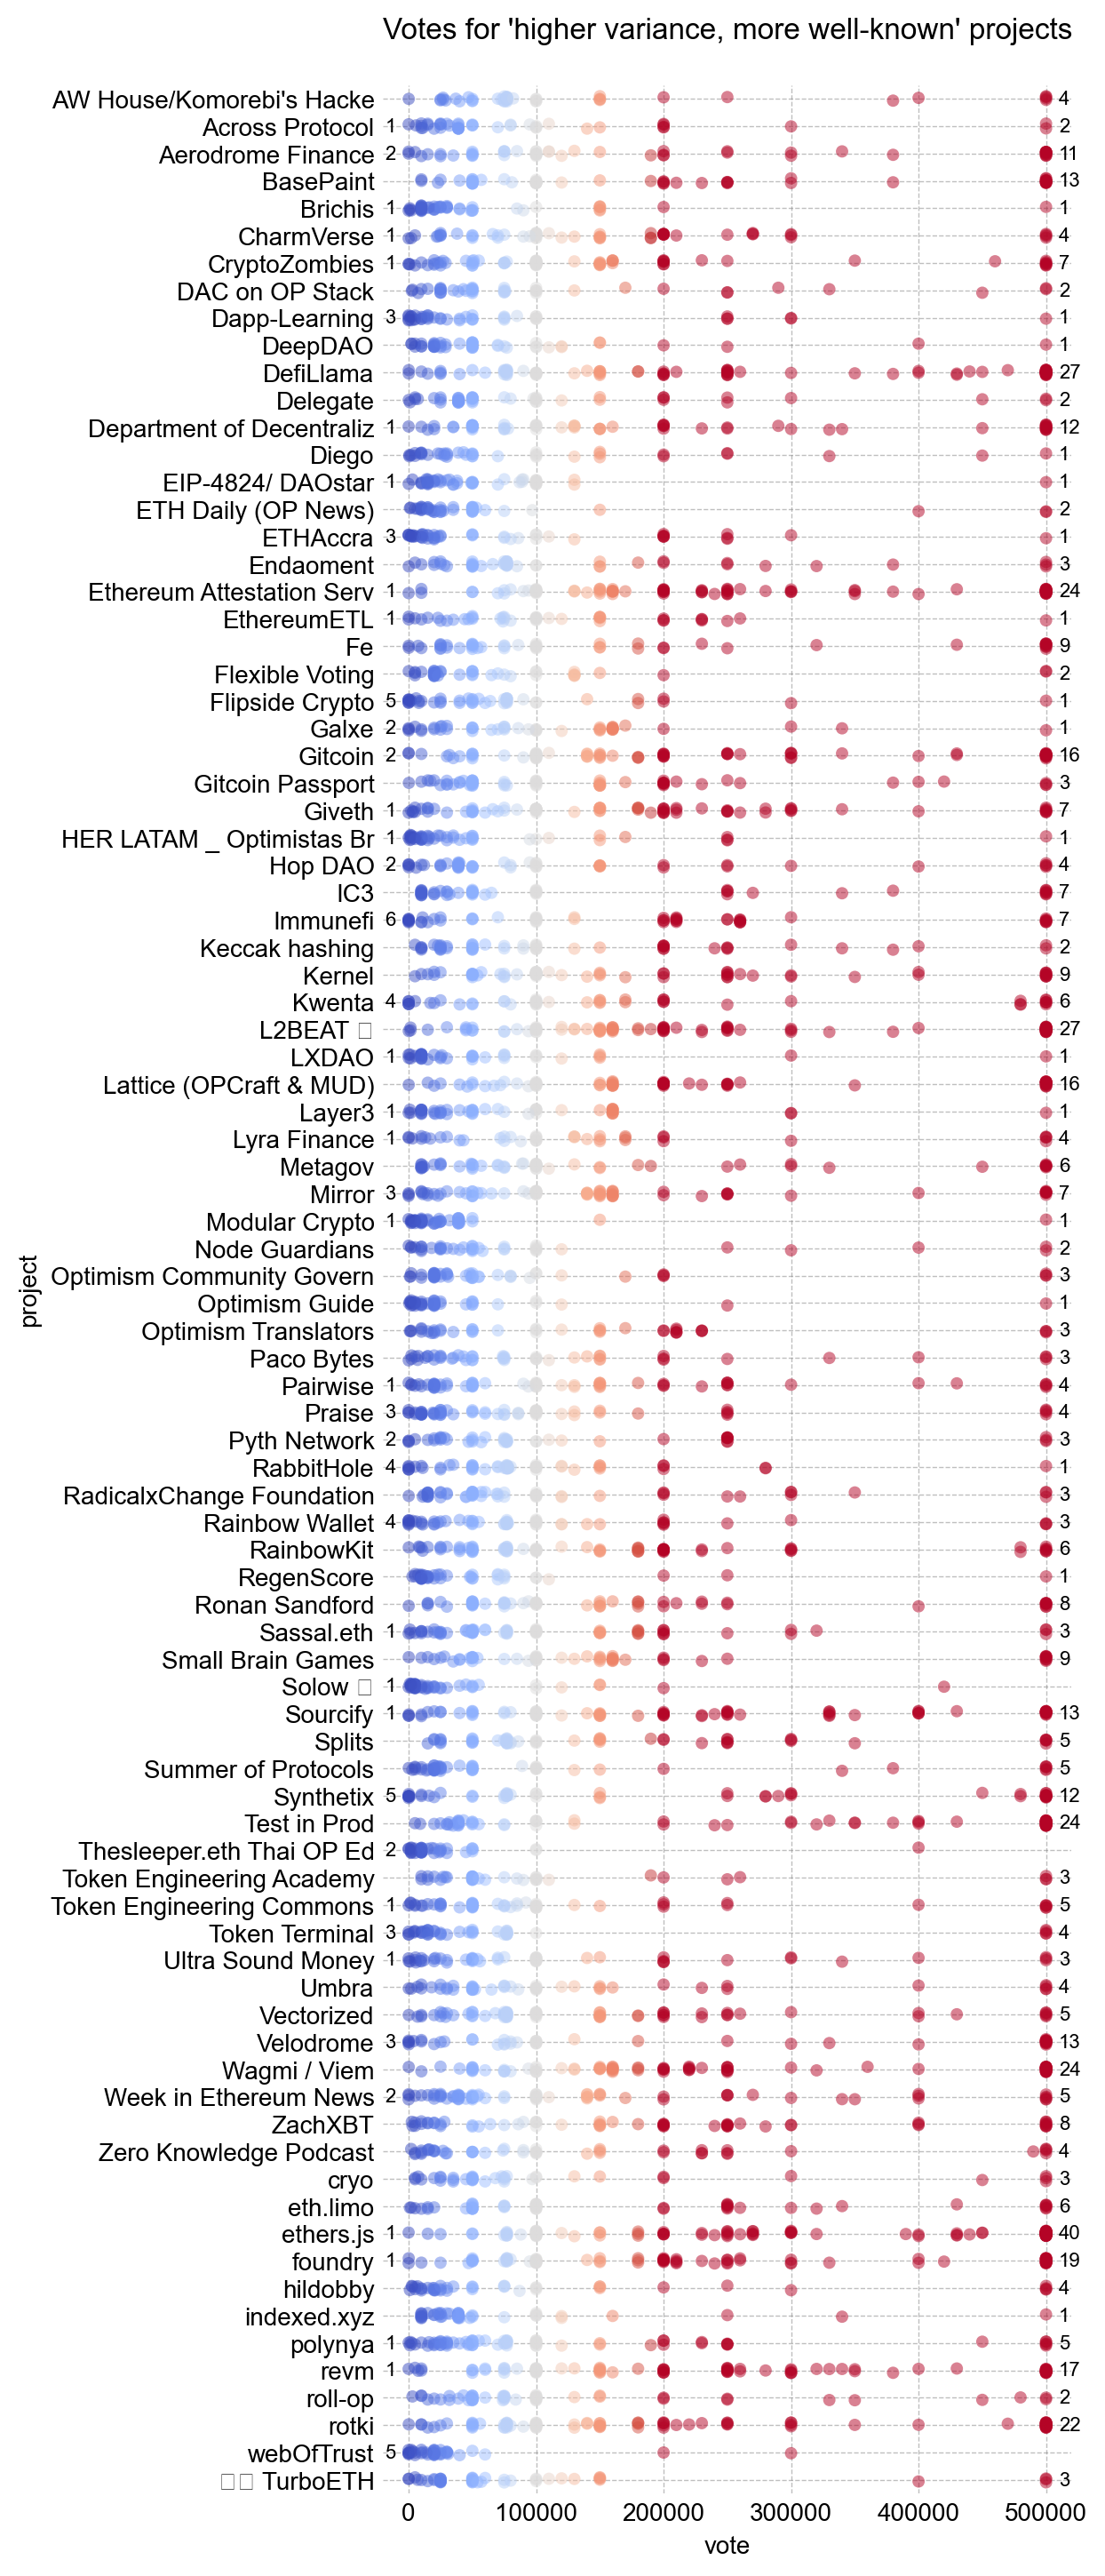

In [14]:
stripplot(CATS[2])

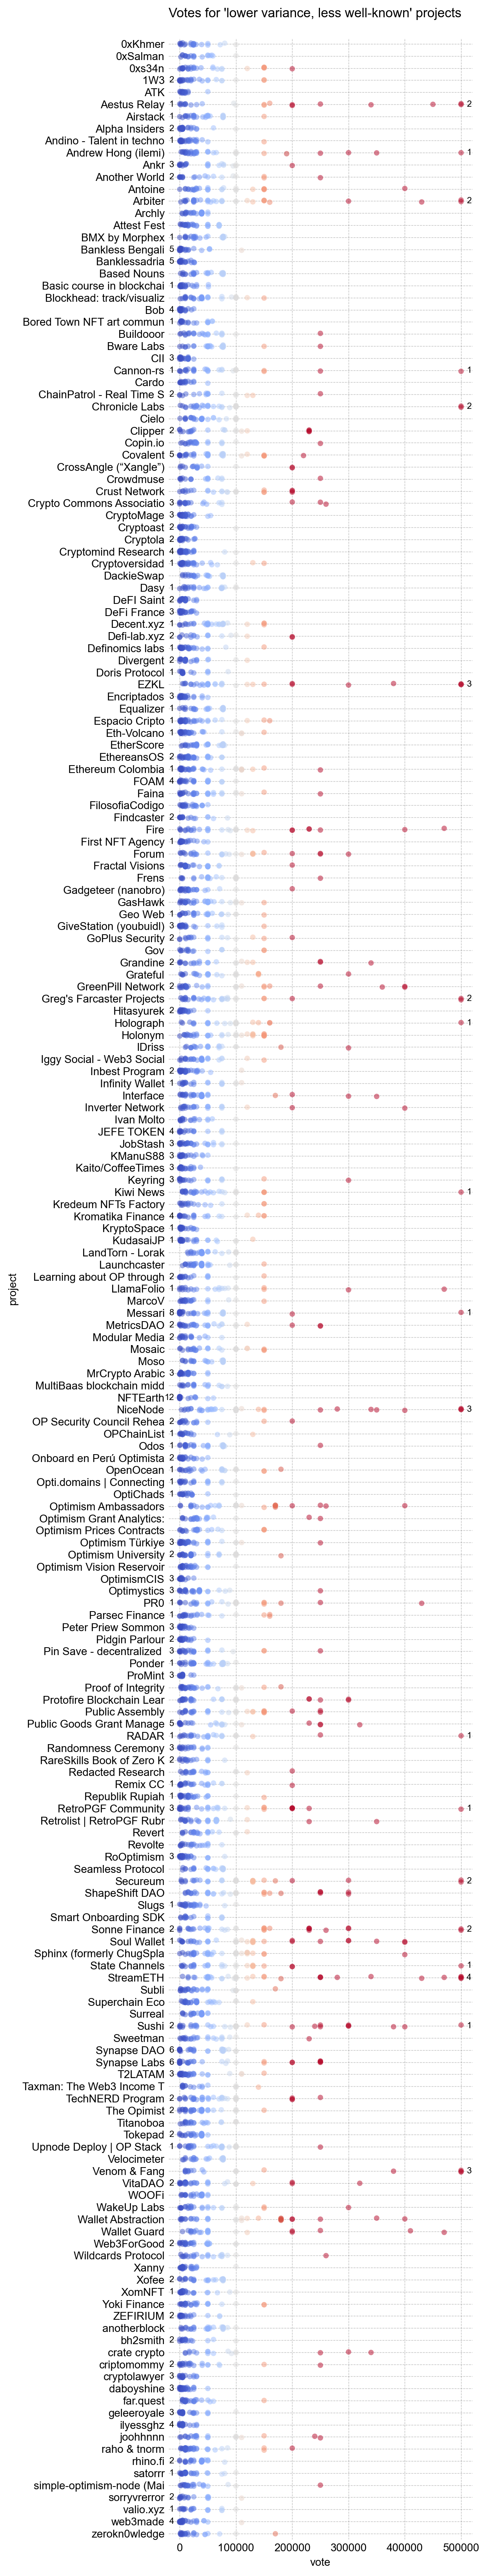

In [15]:
stripplot(CATS[1])

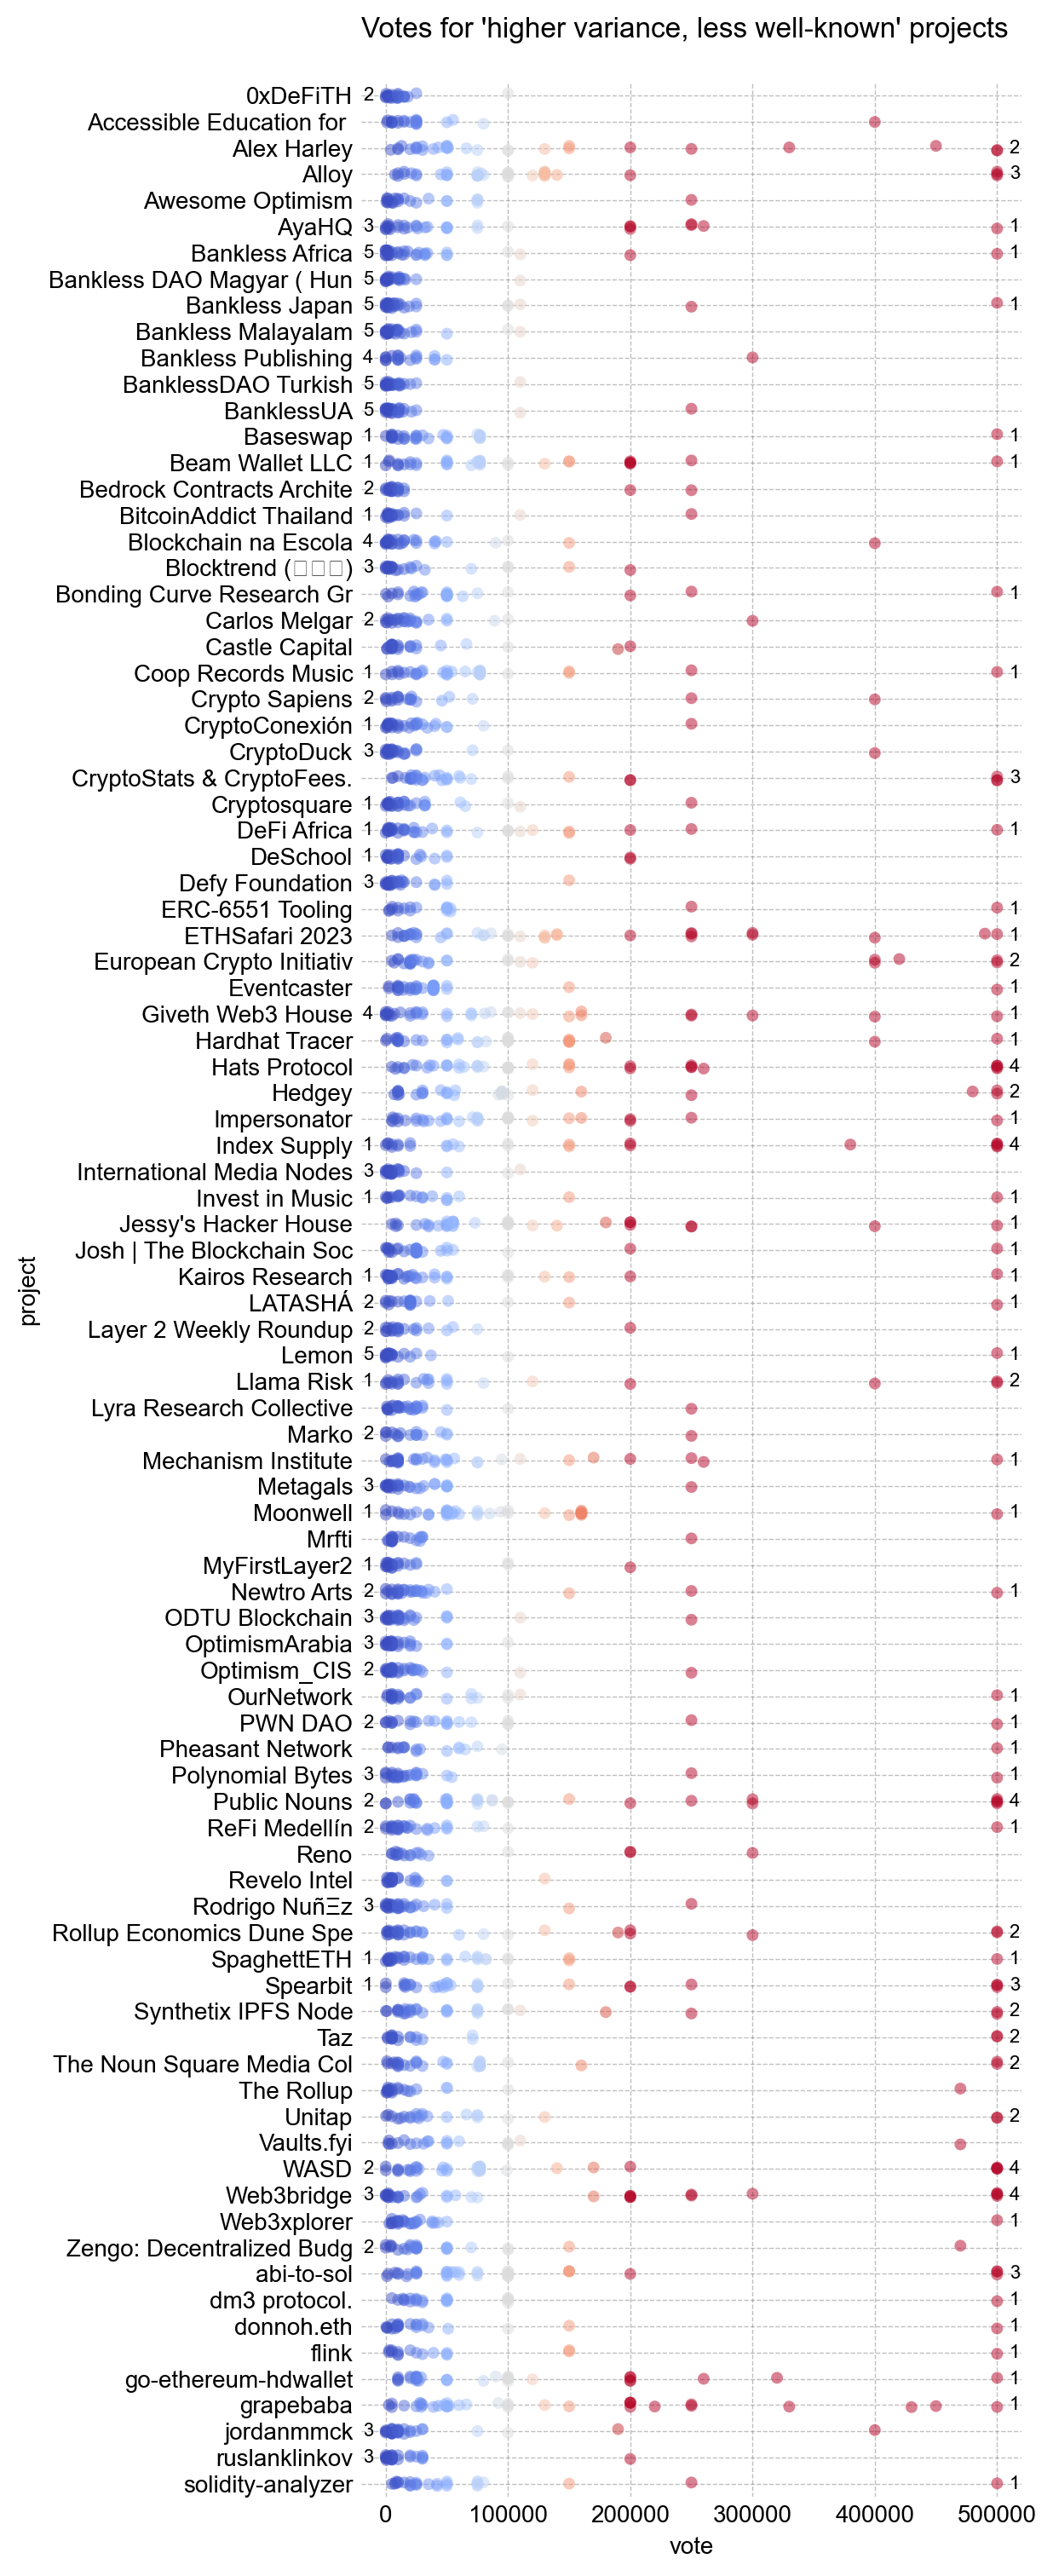

In [16]:
stripplot(CATS[0])